The dataset used for this lab was obtained from:

Manu Siddhartha, November 6, 2020, "Bondora Peer-to-Peer Lending Data", IEEE Dataport, doi: https://dx.doi.org/10.21227/33kz-0s65. 

In [2]:
!pip install -r requirements.txt

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("C:/Users/PC/Documents/Lgbm Model Loans/loan_data.csv", low_memory=False)

df.head()

,new_customer,income_verification,language,age,gender,country,amount,loan_duration,use_of_loan,education,...,credit_score_equifax,credit_score_ee_mini,nr_previous_loans,amount_previous_loans,previous_repayments,previous_early_repayments,previous_early_repayments_count,default,credit_score_fi_asiakas_c,credit_score_fi_asiakas_n
0,0,expenses_verified,estonian,23,male,EE,5500.0,60,loan_consolidation,secondary,...,NaN,1000.0,1,3000.0,571.73,0.0,0,0,NaN,NaN
1,0,expenses_verified,russian,25,male,EE,1200.0,60,other,vocational,...,NaN,1000.0,1,500.0,194.98,0.0,0,0,NaN,NaN
2,1,unverified,estonian,22,female,EE,1000.0,60,other,basic,...,NaN,700.0,0,0.0,0.00,0.0,0,1,NaN,NaN
3,1,unverified,finnish,49,female,FI,1000.0,60,other,basic,...,NaN,NaN,0,0.0,0.00,0.0,0,0,RL2,NaN
4,0,expenses_verified,estonian,25,female,EE,4100.0,60,loan_consolidation,secondary,...,NaN,1000.0,1,1500.0,1309.03,0.0,0,0,NaN,NaN


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("default", axis=1),
    df["default"],
    test_size=0.30,
    random_state=10,
)

In [ ]:
X_eval, X_holdout, y_eval, y_holdout = train_test_split(
    X_test,
    y_test,
    test_size=0.50,
    random_state=10,
)

In [ ]:
X_train.shape, X_eval.shape, X_holdout.shape

((52985, 32), (11354, 32), (11354, 32))

In [ ]:
y_train.mean(), y_eval.mean(), y_holdout.mean()

(0.5587052939511182, 0.5521402149022371, 0.5517879161528977)

In [ ]:
cols_cat = list(X_train.select_dtypes(include="O").columns)

cols_cat

['income_verification',
 'language',
 'gender',
 'country',
 'use_of_loan',
 'education',
 'marital_status',
 'employment_status',
 'employment_duration',
 'work_experience',
 'occupation',
 'home_ownership',
 'credit_score_microL',
 'credit_score_equifax',
 'credit_score_fi_asiakas_c']

In [ ]:
X_train[cols_cat].head(10)

,income_verification,language,gender,country,use_of_loan,education,marital_status,employment_status,employment_duration,work_experience,occupation,home_ownership,credit_score_microL,credit_score_equifax,credit_score_fi_asiakas_c
9928,expenses_verified,spanish,female,ES,loan_consolidation,vocational,divorced,fully,MoreThan5Years,15To25Years,healthcare,living_with_parents,M3,A,NaN
112,expenses_verified,finnish,male,FI,other,higher,married,fully,MoreThan5Years,10To15Years,civil_service,mortgage,NaN,NaN,RL3
38685,expenses_verified,spanish,unknown,ES,unknown,secondary,unknown,not_specified,MoreThan5Years,NaN,unknown,owner,M3,B,NaN
71033,unverified,estonian,female,EE,home_improvement,secondary,cohabitant,fully,MoreThan5Years,15To25Years,other,living_with_parents,NaN,NaN,NaN
46868,expenses_verified,estonian,male,EE,unknown,secondary,unknown,not_specified,UpTo1Year,NaN,unknown,living_with_parents,M,NaN,NaN
24591,unverified,estonian,male,EE,unknown,secondary,unknown,not_specified,UpTo3Years,NaN,unknown,living_with_parents,M,NaN,NaN
50391,expenses_verified,russian,female,EE,loan_consolidation,secondary,married,fully,UpTo1Year,15To25Years,other,owner,NaN,NaN,NaN
14393,unverified,estonian,female,EE,other,secondary,cohabitant,fully,MoreThan5Years,MoreThan25Years,finance,owner,NaN,NaN,NaN
59909,unverified,finnish,male,FI,unknown,primary,unknown,not_specified,UpTo1Year,NaN,unknown,owner,M,NaN,NaN
33581,expenses_verified,estonian,female,EE,other,basic,cohabitant,fully,UpTo1Year,LessThan2Years,processing,joint_tenant,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

enc.fit(X_train[cols_cat])

enc.categories_

[array(['expenses_verified', 'unverified', 'unverified_by_phone',
        'verified'], dtype=object),
 array(['english', 'estonian', 'finnish', 'other', 'russian', 'spanish'],
       dtype=object),
 array(['female', 'male', 'unknown'], dtype=object),
 array(['EE', 'ES', 'FI', 'SK'], dtype=object),
 array(['business', 'education', 'health', 'home_improvement',
        'loan_consolidation', 'other', 'real_estate', 'travel', 'unknown',
        'vehicle'], dtype=object),
 array(['basic', 'higher', 'primary', 'secondary', 'vocational'],
       dtype=object),
 array(['cohabitant', 'divorced', 'married', 'single', 'unknown', 'widow'],
       dtype=object),
 array(['entrepreneur', 'fully', 'not_specified', 'partially', 'retiree',
        'self_employed', nan], dtype=object),
 array(['MoreThan5Years', 'Other', 'Retiree', 'TrialPeriod', 'UpTo1Year',
        'UpTo2Years', 'UpTo3Years', 'UpTo4Years', 'UpTo5Years', nan],
       dtype=object),
 array(['10To15Years', '15To25Years', '2To5Years', '5To1

In [ ]:
X_train_enc = X_train.copy()
X_eval_enc = X_eval.copy()
X_holdout_enc = X_holdout.copy()

In [ ]:
X_train_enc[cols_cat] = enc.transform(X_train[cols_cat])
X_eval_enc[cols_cat] = enc.transform(X_eval[cols_cat])
X_holdout_enc[cols_cat] = enc.transform(X_holdout[cols_cat])

In [ ]:
X_train_enc[cols_cat].head(10)

,income_verification,language,gender,country,use_of_loan,education,marital_status,employment_status,employment_duration,work_experience,occupation,home_ownership,credit_score_microL,credit_score_equifax,credit_score_fi_asiakas_c
9928,0.0,5.0,0.0,1.0,4.0,4.0,1.0,1.0,0.0,1.0,9.0,3.0,4.0,0.0,NaN
112,0.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,0.0,0.0,3.0,4.0,NaN,NaN,2.0
38685,0.0,5.0,2.0,1.0,8.0,3.0,4.0,2.0,0.0,NaN,18.0,6.0,4.0,3.0,NaN
71033,1.0,1.0,0.0,0.0,3.0,3.0,0.0,1.0,0.0,1.0,11.0,3.0,NaN,NaN,NaN
46868,0.0,1.0,1.0,0.0,8.0,3.0,4.0,2.0,4.0,NaN,18.0,3.0,0.0,NaN,NaN
24591,1.0,1.0,1.0,0.0,8.0,3.0,4.0,2.0,6.0,NaN,18.0,3.0,0.0,NaN,NaN
50391,0.0,4.0,0.0,0.0,4.0,3.0,2.0,1.0,4.0,1.0,11.0,6.0,NaN,NaN,NaN
14393,1.0,1.0,0.0,0.0,5.0,3.0,0.0,1.0,0.0,5.0,8.0,6.0,NaN,NaN,NaN
59909,1.0,2.0,1.0,2.0,8.0,2.0,4.0,2.0,4.0,NaN,18.0,6.0,0.0,NaN,NaN
33581,0.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,4.0,4.0,12.0,2.0,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
import lightgbm as lgb

gbm = lgb.LGBMClassifier(
    num_iterations=1000,
    random_state=10,
)

In [ ]:
evals_result = {}

gbm.fit(
    X_train_enc,
    y_train,
    eval_set=[(X_eval_enc, y_eval)],
    categorical_feature=cols_cat,
    callbacks=[
        lgb.early_stopping(3),
        lgb.record_evaluation(evals_result),
    ],
)

/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[123]	valid_0's binary_logloss: 0.557588


LGBMClassifier(num_iterations=1000, random_state=10)

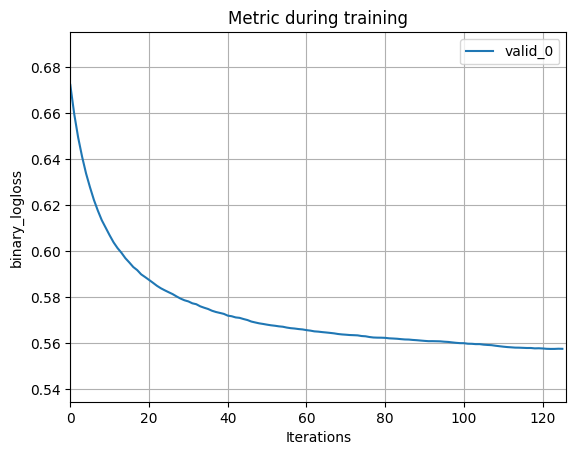

In [ ]:
ax = lgb.plot_metric(evals_result, metric='binary_logloss')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score

pred_train = gbm.predict_proba(X_train_enc)[:, 1]
pred_eval = gbm.predict_proba(X_eval_enc)[:, 1]
pred_holdout = gbm.predict_proba(X_holdout_enc)[:, 1]

In [ ]:
roc_train = roc_auc_score(y_train, pred_train)
roc_eval = roc_auc_score(y_eval, pred_eval)
roc_holdout = roc_auc_score(y_holdout, pred_holdout)

In [ ]:
print(f"Train set roc-auc: {roc_train}")
print(f"Eval set roc-auc: {roc_eval}")
print(f"Hold-out set roc-auc: {roc_holdout}")

Train set roc-auc: 0.8200792965564637
Eval set roc-auc: 0.7807894600218679
Hold-out set roc-auc: 0.7721683483318558


In [ ]:
pred_train = gbm.predict(X_train_enc)
pred_eval = gbm.predict(X_eval_enc)
pred_holdout = gbm.predict(X_holdout_enc)

In [ ]:
acc_train = accuracy_score(y_train, pred_train)
acc_eval = accuracy_score(y_eval, pred_eval)
acc_holdout = accuracy_score(y_holdout, pred_holdout)

In [ ]:
print(f"Train set accuracy: {acc_train}")
print(f"Eval set accuracy: {acc_eval}")
print(f"Hold-out set accuracy: {acc_holdout}")

Train set accuracy: 0.7451542889497027
Eval set accuracy: 0.7145499383477188
Hold-out set accuracy: 0.7080324114849392


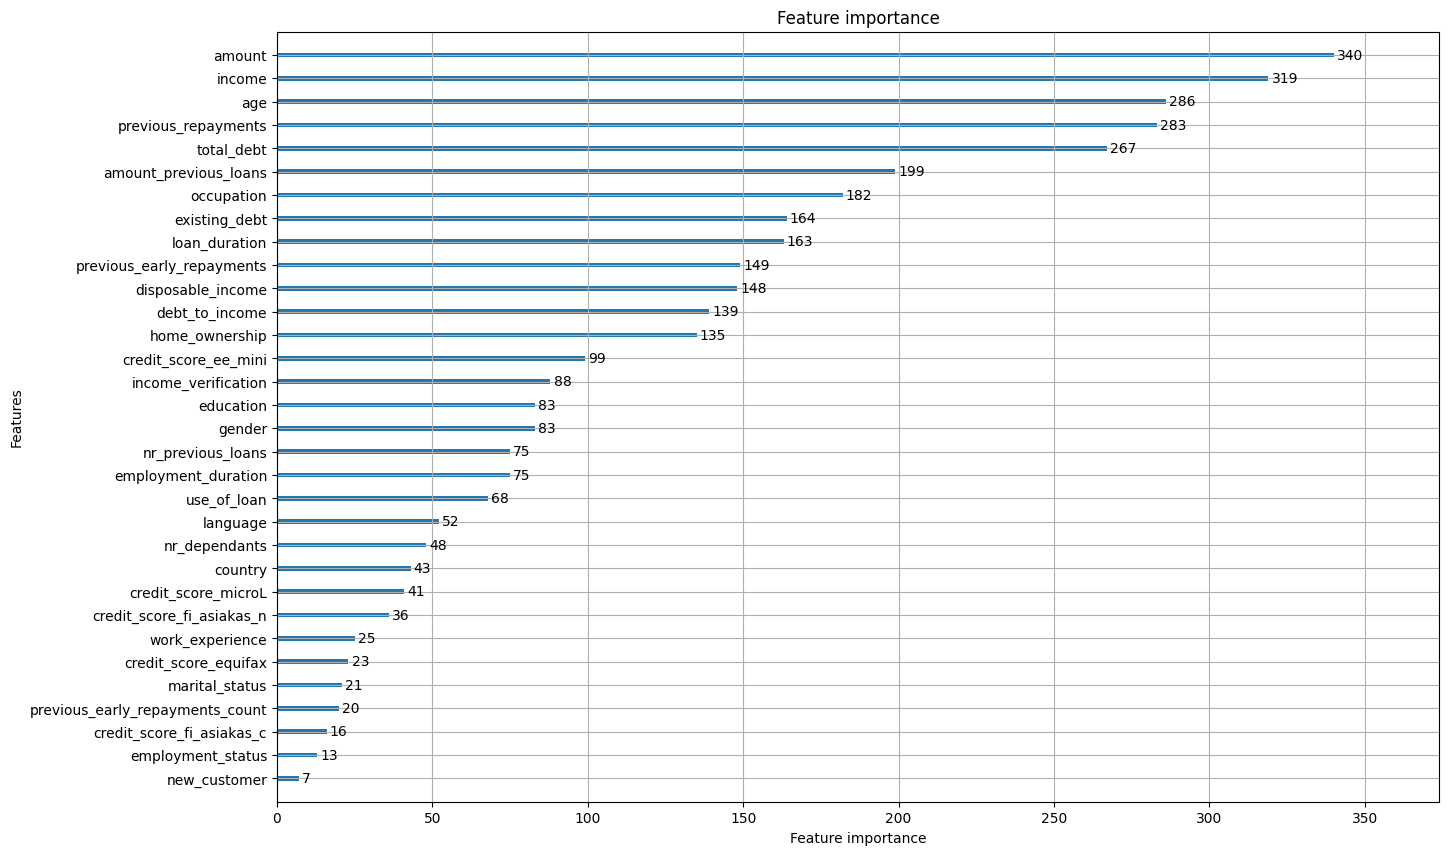

In [ ]:
ax = lgb.plot_importance(gbm, figsize=(15, 10))
plt.show()

In [ ]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

gbm = lgb.LGBMClassifier(
    num_iterations=1000,
    random_state=10,
)

In [ ]:
param_grid = dict(
    n_estimators=stats.randint(10, 120),
    num_leaves=stats.randint(1, 100),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0.0001, 1),
)

In [ ]:
search = RandomizedSearchCV(
    gbm,
    param_grid,
    scoring='roc_auc',
    cv=3,
    n_iter=150,
    random_state=10,
    refit=True,
)

In [ ]:
search.fit(
    X=X_train_enc,
    y=y_train,
    eval_set=[(X_eval_enc, y_eval)],
    categorical_feature=cols_cat,
    callbacks=[lgb.early_stopping(3)],
)

/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58011


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.569652


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.568225


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566968


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.562455


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.562455


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.56192


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /__w/1/s/python-package/compile/sr

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.560354


/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['country', 'credit_score_equifax', 'credit_score_fi_asiakas_c', 'credit_score_microL', 'education', 'employment_duration', 'employment_status', 'gender', 'home_ownership', 'income_verification', 'language', 'marital_status', 'occupation', 'use_of_loan', 'work_experience']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/labsuser/.local/lib/python3.8/site-packages/lightgbm/basic.py:1780: UserWarning: Ov

In [ ]:
search.best_params_



In [ ]:
results = pd.DataFrame(search.cv_results_)

results.sort_values(by='mean_test_score', ascending=True, inplace=True)
results.reset_index(drop=True, inplace=True)

In [ ]:
results['mean_test_score'].plot(
    yerr=[results['std_test_score'],
          results['std_test_score']],
    subplots=True)
 
plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [ ]:
pred_train = search.predict_proba(X_train_enc)[:,1]
pred_eval = search.predict_proba(X_eval_enc)[:,1]
pred_holdout = search.predict_proba(X_holdout_enc)[:,1]

In [ ]:
roc_train = roc_auc_score(y_train, pred_train)
roc_eval = roc_auc_score(y_eval, pred_eval)
roc_holdout = roc_auc_score(y_holdout, pred_holdout)

In [ ]:
print(f"Train set roc-auc: {roc_train}")
print(f"Eval set roc-auc: {roc_eval}")
print(f"Hold-out set roc-auc: {roc_holdout}")

In [ ]:
pred_train = search.predict(X_train_enc)
pred_eval = search.predict(X_eval_enc)
pred_holdout = search.predict(X_holdout_enc)

In [ ]:
acc_train = accuracy_score(y_train, pred_train)
acc_eval = accuracy_score(y_eval, pred_eval)
acc_holdout = accuracy_score(y_holdout, pred_holdout)

In [ ]:
print(f"Train set accuracy: {acc_train}")
print(f"Eval set accuracy: {acc_eval}")
print(f"Hold-out set accuracy: {acc_holdout}")

In [ ]:
import joblib

logit = joblib.load("model.pkl")

In [ ]:
pred_train = logit.predict_proba(X_train)[:,1]
pred_eval = logit.predict_proba(X_eval)[:,1]
pred_holdout = logit.predict_proba(X_holdout)[:,1]

In [ ]:
roc_train = roc_auc_score(y_train, pred_train)
roc_eval = roc_auc_score(y_eval, pred_eval)
roc_holdout = roc_auc_score(y_holdout, pred_holdout)

In [ ]:
print(f"Train set roc-auc: {roc_train}")
print(f"Eval set roc-auc: {roc_eval}")
print(f"Hold-out set roc-auc: {roc_holdout}")

In [ ]:
pred_train = search.predict(X_train_enc)
pred_eval = search.predict(X_eval_enc)
pred_holdout = search.predict(X_holdout_enc)

In [ ]:
pred_train = logit.predict(X_train)
pred_eval = logit.predict(X_eval)
pred_holdout = logit.predict(X_holdout)

In [ ]:
print(f"Train set accuracy: {acc_train}")
print(f"Eval set accuracy: {acc_eval}")
print(f"Hold-out set accuracy: {acc_holdout}")

In [ ]:
from sklearn.metrics import RocCurveDisplay

logit_dist = RocCurveDisplay.from_predictions(
    y_holdout,
    logit.predict_proba(X_holdout)[:, 1],
    label="Logit",
)
 
gbm_dist = RocCurveDisplay.from_predictions(
    y_holdout,
    search.predict_proba(X_holdout_enc)[:, 1],
    ax=logit_dist.ax_,
    label="lgbm",
)
 
plt.show()

In [ ]:
result = pd.concat([
    pd.Series(search.predict_proba(X_holdout_enc)[:, 1]),
    pd.Series(logit.predict_proba(X_holdout)[:, 1])
], axis=1)
 
result.columns = ['probs_lgbm', 'probs_logit']

In [ ]:
result.head()



In [ ]:
def rate(prob):
    if prob <=0.1:
        return "A"
    elif prob <= 0.2:
        return "B"
    elif prob <= 0.3:
        return "C"
    elif prob <= 0.4:
        return "D"
    elif prob <= 0.5:
        return "E"
    else:
        return "F"

In [ ]:
result['rating_lgbm'] = result["probs_lgbm"].apply(rate)

result['rating_logit'] = result["probs_logit"].apply(rate)

In [ ]:
result.head()

In [ ]:
# Determine proportion of observations per interest band
 
t1 = result["rating_logit"].value_counts(normalize=True)
t2 = result["rating_lgbm"].value_counts(normalize=True)
 
 
# concatenate proportions
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ["logit", "lgbm"]
tmp.sort_index(inplace=True)
 
# plot
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel("Number of customers per band")
plt.title("Customers per interest band")
plt.show()

In [ ]:
import numpy as np

def gain(variables):
    band, amount = variables
    if band == "A":
        return amount + amount*0.1
    elif band == "B":
        return amount + amount*0.2
    elif band == "C":
        return amount + amount*0.3
    elif band == "D":
        return amount + amount*0.4
    elif band == "E":
        return amount + amount*0.5
    else:
        return np.nan

In [ ]:
result["amount"] = X_holdout["amount"].reset_index(drop=True)

result["default"] = y_holdout.reset_index(drop=True)

In [ ]:
result["gain_lgbm"] = result[["rating_lgbm", "amount"]].apply(gain, axis=1)
result["gain_logit"] = result[["rating_logit", "amount"]].apply(
    gain, axis=1)

result.head(10)

In [ ]:
tmp = result[result["rating_lgbm"] != "F"].groupby(
    ["rating_lgbm", "default"])[
    ["gain_lgbm", "amount"]].sum().unstack()
 
tmp

In [ ]:
tmp = tmp["gain_lgbm"][0] - tmp["amount"][1]
tmp.sum()

In [ ]:
tmp = result[result["rating_logit"] != "F"].groupby(
    ["rating_logit", "default"])[
    ["gain_logit", "amount"]].sum().unstack()
 
tmp = tmp["gain_logit"][0] - tmp["amount"][1]
 
tmp.sum()